# 2.1 分类与回归

# 2.2 泛化、过拟合与欠拟合

# 2.3 监督学习算法

## 2.3.1 一些样本数据集

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
X, y = mglearn.datasets.make_forge() # forge数据集用于说明二分类数据集算法
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:{}'.format(X.shape))

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


X.shape:(26, 2)


Text(0, 0.5, 'Target')

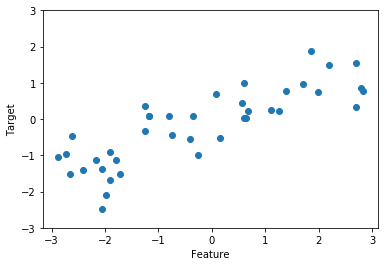

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40) # wave数据集用于说明回归算法
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # 高维二分类数据集
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print('shape of cancer data:{}'.format(cancer['data'].shape))

shape of cancer data:(569, 30)


In [5]:
print('sample counts per class:\n{}'.format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import load_boston
boston = load_boston() # 高维回归数据集
print('Data shape:{}'.format(boston.data.shape))

Data shape:(506, 13)


In [8]:
X,y = mglearn.datasets.load_extended_boston()
print('X_shape:{}'.format(X.shape))

X_shape:(506, 104)


## 2.3.2 K近邻

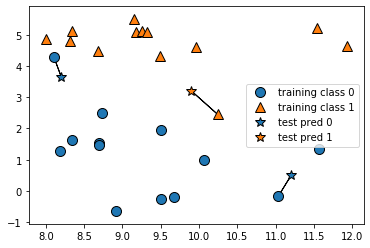

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

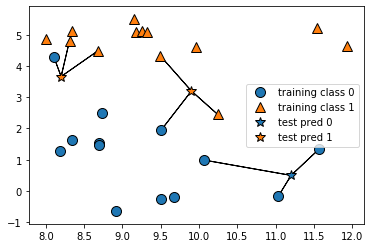

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set predictions:{}'.format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [12]:
print('Test set accuracy:{:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy:0.86


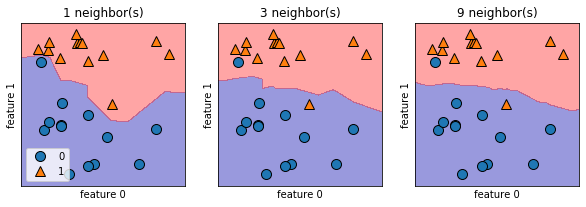

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0],X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

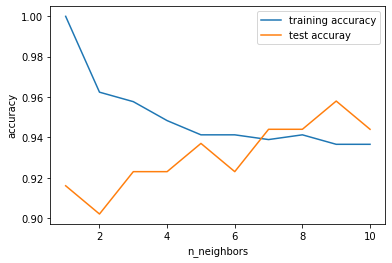

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
training_accuracy=[]
test_accuracy=[]
neighbors_setting = range(1, 11)
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuray')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

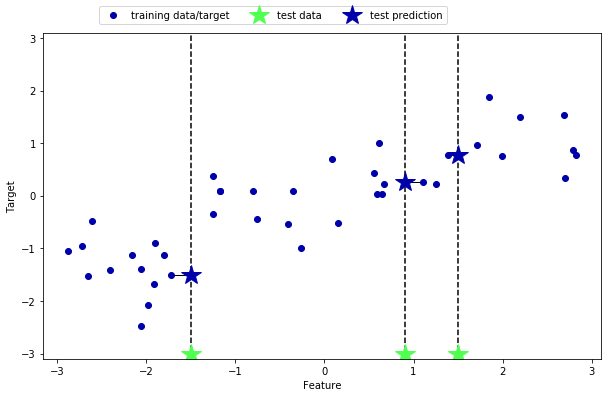

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1) # K近邻算法也可用于回归

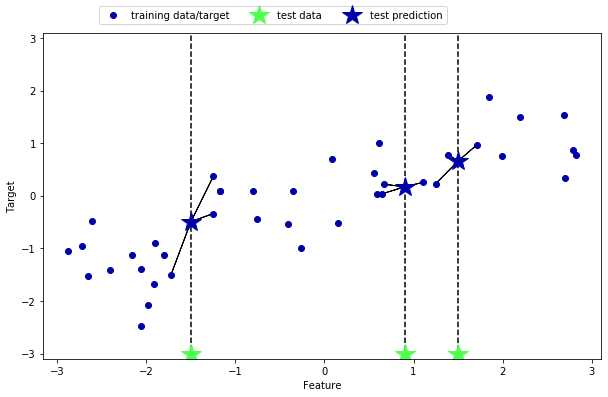

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [18]:
print('Test set R^2:{:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2:0.83


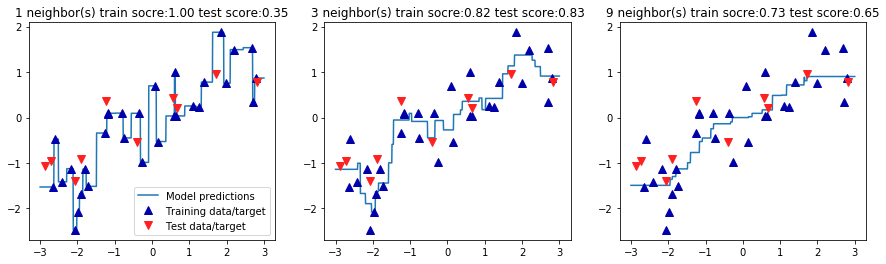

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    '{} neighbor(s) train socre:{:.2f} test score:{:.2f}'.format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

## 2.3.3 线性模型

w[0]: 0.393906  b: -0.031804


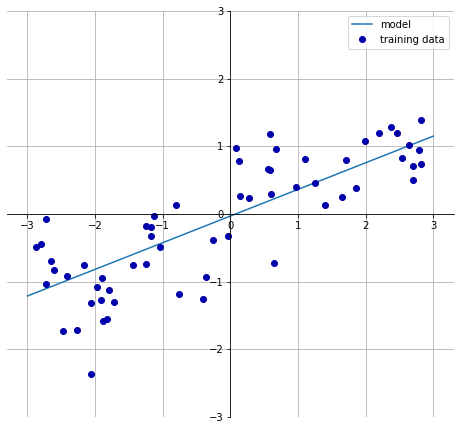

In [20]:
mglearn.plots.plot_linear_regression_wave()

In [21]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_:{}'.format(lr.coef_)) # coef_属性是一个NumPy数组，每个元素对应一个输入特征
print('lr.intercept_:{}'.format(lr.intercept_)) # intercept_属性是一个浮点数

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [22]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))

Training set score:0.67


In [23]:
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Test set score:0.66


In [24]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [25]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))

Training set score:0.95


In [26]:
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Test set score:0.61


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) # alpha默认为1.0
print('Training set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


In [28]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


In [29]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


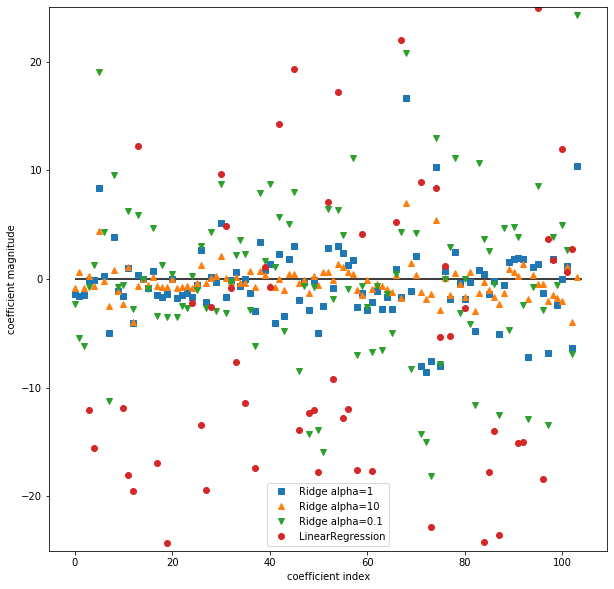

In [30]:
plt.figure(figsize=(10, 10))
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

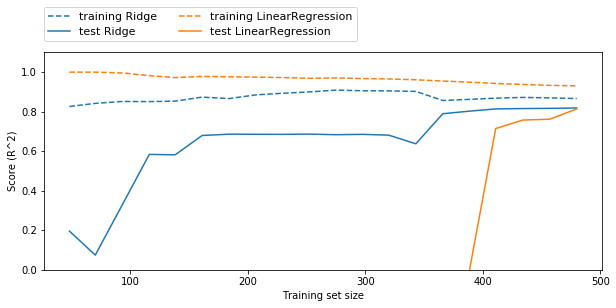

In [57]:
plt.figure(figsize=(10,4))
mglearn.plots.plot_ridge_n_samples()

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X=X_train,y=y_train) # alpha的默认值是1.0
print('Training set score:{:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_!=0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


In [43]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso001.coef_!=0)))

Training set score:0.90
Test set score:0.77
Number of features used:33


In [44]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso00001.coef_!=0)))

Training set score:0.95
Test set score:0.64
Number of features used:96


Text(0, 0.5, 'coefficient magnitude')

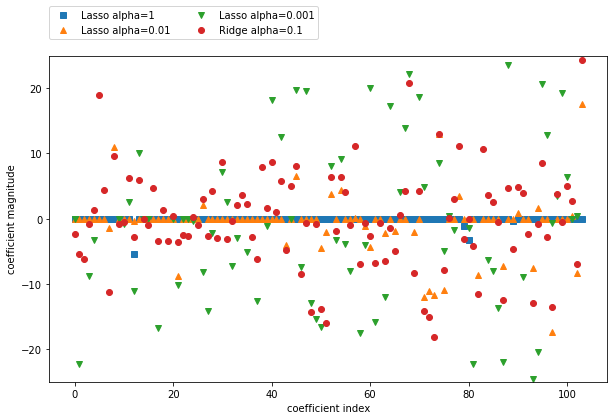

In [53]:
plt.figure(figsize=(10,6))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')